c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006\ch05
c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006
epoch:0, train acc:0.07666666666666666, test acc:0.0949
epoch:1, train acc:0.06, test acc:0.0794
epoch:2, train acc:0.05333333333333334, test acc:0.0728
epoch:3, train acc:0.07333333333333333, test acc:0.0795
epoch:4, train acc:0.08666666666666667, test acc:0.0887
epoch:5, train acc:0.13, test acc:0.1073
epoch:6, train acc:0.15333333333333332, test acc:0.1206
epoch:7, train acc:0.16666666666666666, test acc:0.1397
epoch:8, train acc:0.19333333333333333, test acc:0.1555
epoch:9, train acc:0.24333333333333335, test acc:0.1875
epoch:10, train acc:0.27666666666666667, test acc:0.213
epoch:11, train acc:0.31, test acc:0.2295
epoch:12, train acc:0.33, test acc:0.2402
epoch:13, train acc:0.33666666666666667, test acc:0.2561
epoch:14, train acc:0.3466666666666667, test acc:0.2708
epoch:15, train acc:0.3566666666666667, test a

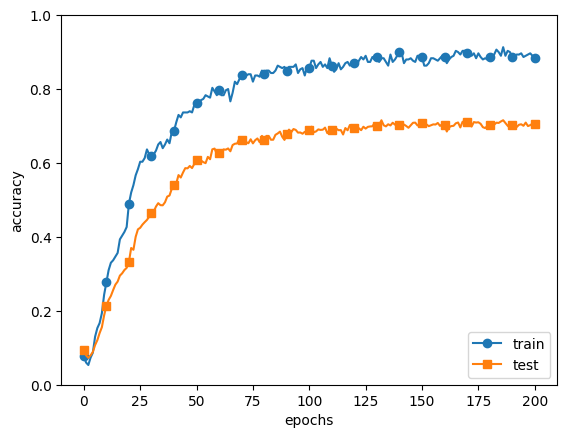

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay (가중치 감쇠) 설정
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
#

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np. random. choice(train_size, batch_size)
    x_batch = x_train [batch_mask]
    t_batch = t_train [batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer. update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기 ==
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt. legend(loc='lower right')
plt.show()

c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006
c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks
train loss:2.2954222665341053
=== epoch:1, train acc:0.1, test acc:0.0962 ===
train loss:2.2680701050178396
train loss:2.2852367725241134
train loss:2.281093768103336
=== epoch:2, train acc:0.1, test acc:0.0969 ===
train loss:2.2679709705737325
train loss:2.265169158391742
train loss:2.2716941963652824
=== epoch:3, train acc:0.1, test acc:0.098 ===
train loss:2.3054884031307528
train loss:2.3092970753479802
train loss:2.29811766476446
=== epoch:4, train acc:0.10333333333333333, test acc:0.1001 ===
train loss:2.296200326641647
train loss:2.275397442674108
train loss:2.283207300159848
=== epoch:5, train acc:0.10333333333333333, test acc:0.1016 ===
train loss:2.2908306190974113
train loss:2.28526602212148
train loss:2.2799316934139653
=== epoch:6, train acc:0.10333333333333333, test acc:0.1036 ===
train loss:2.2871131758827117
train loss:

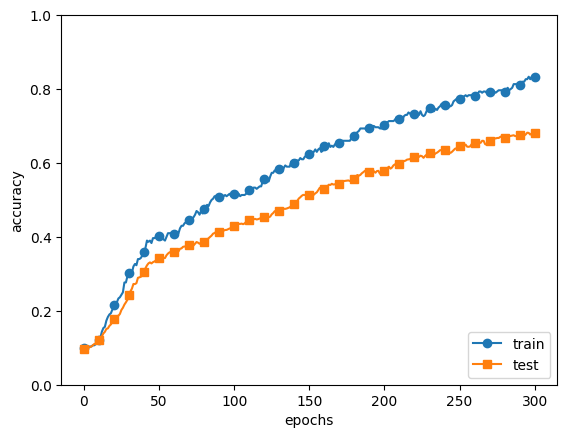

In [3]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정
use_dropout = True # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기 =:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt. legend(loc='lower right')
plt.show()